<a href="https://colab.research.google.com/github/armandossrecife/vs-final/blob/master/projetofinalvc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final de Visualização Científica

## Dataset

### Snapshot

[Github Hadoop Bug-fix](https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/hadoop-full-bug-fix-dataset-pv.csv)

[Github Mapreduce Bug-fix](https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/mapreduce-full-bug-fix-dataset-pv.csv)

[Github HDFS](https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/hdfs-full-bug-fix-dataset-pv.csv)

[Github YARN](https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/yarn-full-bug-fix-dataset-pv.csv)

In [0]:
URL_SNAPSHOT_HADOOP = "https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/hadoop-full-bug-fix-dataset-pv.csv"
URL_SNAPSHOT_MAPREDUCE = "https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/mapreduce-full-bug-fix-dataset-pv.csv"
URL_SNAPSHOT_HDFS = "https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/hdfs-full-bug-fix-dataset-pv.csv"
URL_SNAPSHOT_YARN = "https://raw.githubusercontent.com/scientific-visualization/final/master/snapshot/yarn-full-bug-fix-dataset-pv.csv"

## Loadind Dataset

In [0]:
import pandas as pd

In [0]:
df_snapshot_hadoop = pd.read_csv(URL_SNAPSHOT_HADOOP, sep=';')
df_snapshot_mapreduce = pd.read_csv(URL_SNAPSHOT_MAPREDUCE, sep=';')
df_snapshot_hdfs = pd.read_csv(URL_SNAPSHOT_HDFS, sep=';')
df_snapshot_yarn = pd.read_csv(URL_SNAPSHOT_YARN, sep=';')

## Routines

### Imports

In [0]:
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

### Functions

In [0]:
# Show all rows from DataFrame
def print_full(myDF):
  try:
    with pd.option_context("display.max_rows", myDF.shape[0]):
      display(myDF)
  except Exception as e:
    print("type erro:" + str(e))

# Show rows with NaN content from DataFrame
def show_rows_with_NaN(myDF):
  try:
    df1 = myDF[myDF.isna().any(axis=1)]
  except Exception as e:
    print("type erro:" + str(e))
  return df1

# Specific convet to DateTime (01 <= Year <= 19)
def convert_to_DateTime(myDF, column):
  try: 
    for i in range(myDF.shape[0]):
      dateAux = myDF.loc[i, column]
      splitDateAux = dateAux.split("/") 
      yearAux = splitDateAux[2]
      year = int(yearAux) + 2000
      date = splitDateAux[0] + "/" + splitDateAux[1] + "/" + str(year)
      myDF.loc[i, column] = datetime.strptime(date, "%m/%d/%Y")
  except Exception as e:
    print("Error: " + str(e))
  return myDF

# Data

## Hadoop Bug-Fix

In [40]:
df_snapshot_hadoop.head(5)

,Unnamed: 0,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,0,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4975,Major,Closed,jly,jly,NaN,set:1 passed:1,using:3 set:2 key:2 value:2 classes:2 read:2 c...,exec:13 configuration:8 patch:8 parser:6 chang...,2009-01-02 12:13:20+00:00,2009-01-23 22:35:41+00:00,0.19.0,0.21.0,9,2009-01-02 12:15:39.658000+00:00,2009-06-24 07:34:49.613000+00:00,0,3,2009-01-02 12:15:39.626000+00:00,2009-01-13 12:54:01.556000+00:00,3,2009-01-02 12:15:39.626000+00:00,2009-01-13 12:54:01.556000+00:00,NaN,Reference:HADOOP-6103,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4977,Blocker,Closed,matei,vivekr,NaN,deadlock:1,java:32 apache:17 jetty:15 lock:11 handle:10 s...,patch:19 calls:17 exec:13 call:10 one:7 schedu...,2009-01-02 23:18:35+00:00,2009-01-15 02:58:26+00:00,0.19.0,0.20.0,13,2009-01-02 23:23:59.664000+00:00,2009-01-15 02:58:26.681000+00:00,0,6,2009-01-02 23:23:59.629000+00:00,2009-01-15 01:49:11.906000+00:00,5,2009-01-09 08:39:18.444000+00:00,2009-01-15 01:49:11.906000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4979,Major,Closed,vivekr,vivekr,NaN,capacity:1 scheduler:1 always:1 return:1 task:...,job:5 task:4 scheduler:3 high:3 mem:3 reduce:3...,exec:13 patch:12 test:4 fix:3 first:3 job:3 tr...,2009-01-05 04:25:51+00:00,2009-01-05 11:40:13+00:00,NaN,0.20.0,7,2009-01-05 05:44:38.732000+00:00,2009-01-06 19:18:24.056000+00:00,0,3,2009-01-05 05:44:38.674000+00:00,2009-01-05 11:29:32.125000+00:00,3,2009-01-05 05:44:38.674000+00:00,2009-01-05 11:29:32.125000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4982,Major,Closed,shv,shv,test,run:1 eclipse:1,falls:1 infinite:1 loop:1 run:1 eclipse:1 uses...,exec:13 patch:7 fix:2 applied:2 author:2 tests...,2009-01-05 22:03:11+00:00,2009-01-09 00:59:09+00:00,0.18.0,0.19.1,5,2009-01-05 22:31:12.439000+00:00,2009-01-09 00:59:09.789000+00:00,0,2,2009-01-05 22:31:12.393000+00:00,2009-01-09 00:58:02.517000+00:00,2,2009-01-05 22:31:12.393000+00:00,2009-01-09 00:58:02.517000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4983,Critical,Closed,owen.omalley,amareshwari,NaN,job:1 counters:1 sometimes:1 go:1 tasks:1 run:...,seem:2 tasks:1 run:1 counters:1 back:1 move:1 ...,exec:17 patch:11 counters:4 tests:4 status:2 u...,2009-01-06 00:36:19+00:00,2009-01-21 06:55:01+00:00,0.19.0,0.19.1 0.18.3,4,2009-01-07 06:19:21.106000+00:00,2009-01-21 06:55:01.026000+00:00,0,1,2009-01-15 08:57:12.745000+00:00,2009-01-15 08:57:12.745000+00:00,1,2009-01-15 08:57:12.745000+00:00,2009-01-15 08:57:12.745000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_snapshot_hadoop.drop(['Unnamed: 0'], axis=1, inplace=True)

In [42]:
df_snapshot_hadoop.head(3)

,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4975,Major,Closed,jly,jly,NaN,set:1 passed:1,using:3 set:2 key:2 value:2 classes:2 read:2 c...,exec:13 configuration:8 patch:8 parser:6 chang...,2009-01-02 12:13:20+00:00,2009-01-23 22:35:41+00:00,0.19.0,0.21.0,9,2009-01-02 12:15:39.658000+00:00,2009-06-24 07:34:49.613000+00:00,0,3,2009-01-02 12:15:39.626000+00:00,2009-01-13 12:54:01.556000+00:00,3,2009-01-02 12:15:39.626000+00:00,2009-01-13 12:54:01.556000+00:00,NaN,Reference:HADOOP-6103,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4977,Blocker,Closed,matei,vivekr,NaN,deadlock:1,java:32 apache:17 jetty:15 lock:11 handle:10 s...,patch:19 calls:17 exec:13 call:10 one:7 schedu...,2009-01-02 23:18:35+00:00,2009-01-15 02:58:26+00:00,0.19.0,0.20.0,13,2009-01-02 23:23:59.664000+00:00,2009-01-15 02:58:26.681000+00:00,0,6,2009-01-02 23:23:59.629000+00:00,2009-01-15 01:49:11.906000+00:00,5,2009-01-09 08:39:18.444000+00:00,2009-01-15 01:49:11.906000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HADOOP,ASF,Apache Hadoop Committee,big-data,HADOOP-4979,Major,Closed,vivekr,vivekr,NaN,capacity:1 scheduler:1 always:1 return:1 task:...,job:5 task:4 scheduler:3 high:3 mem:3 reduce:3...,exec:13 patch:12 test:4 fix:3 first:3 job:3 tr...,2009-01-05 04:25:51+00:00,2009-01-05 11:40:13+00:00,NaN,0.20.0,7,2009-01-05 05:44:38.732000+00:00,2009-01-06 19:18:24.056000+00:00,0,3,2009-01-05 05:44:38.674000+00:00,2009-01-05 11:29:32.125000+00:00,3,2009-01-05 05:44:38.674000+00:00,2009-01-05 11:29:32.125000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
df_snapshot_hadoop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 53 columns):
Project                      2861 non-null object
Owner                        2861 non-null object
Manager                      2861 non-null object
Category                     2861 non-null object
Key                          2861 non-null object
Priority                     2861 non-null object
Status                       2861 non-null object
Reporter                     2861 non-null object
Assignee                     2762 non-null object
Components                   1868 non-null object
SummaryTopWords              2844 non-null object
DescriptionTopWords          2772 non-null object
CommentsTopWords             2854 non-null object
CreationDate                 2861 non-null object
ResolutionDate               2861 non-null object
AffectsVersions              1932 non-null object
FixVersions                  2688 non-null object
NoComments                   2861 non-null 

In [44]:
df_snapshot_hadoop.describe()

,NoComments,NoWatchers,NoAttachments,NoAttachedPatches,HasMergeCommit,NoCommits,NoAuthors,NoCommitters,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
count,2861.000000,2861.0,2861.000000,2861.000000,2861.0,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,14.134568,0.0,2.385530,2.187347,0.0,0.840615,0.783992,0.785739,0.030409,0.025516,0.518001,53.552254,22.601188,0.044041,0.011534,1.675288,22.817546,13.069906,0.052779,0.052429,0.519399,20.028312,10.951416
std,10.990797,0.0,2.213733,2.150263,0.0,0.605141,0.481296,0.483887,0.423255,0.574255,3.892180,1548.976602,680.473882,1.002872,0.234013,5.232942,149.370922,137.499523,0.317899,2.324101,1.831177,76.575112,268.548929
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.0,2.000000,2.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,3.000000,3.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,4.000000,0.000000,0.000000,1.000000,8.000000,0.000000
max,189.000000,0.0,38.000000,38.000000,0.0,6.000000,3.000000,3.000000,14.000000,20.000000,190.000000,65135.000000,30252.000000,52.000000,8.000000,249.000000,5779.000000,5766.000000,8.000000,124.000000,54.000000,1931.000000,14123.000000


### Número de Comentários

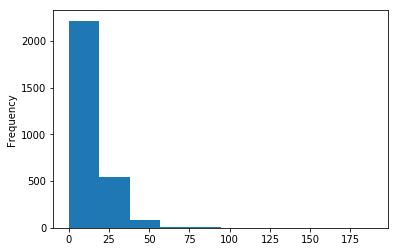

In [45]:
df_snapshot_hadoop.NoComments.plot(kind='hist')

### Número de Comentários agrupados por Prioridade

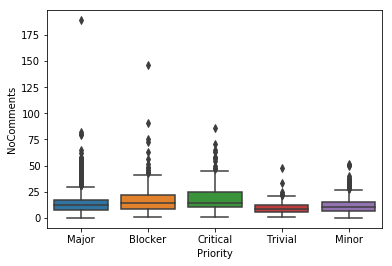

In [46]:
sns.boxplot(x='Priority', y='NoComments', data=df_snapshot_hadoop)

### Relação entre número de comentários e Quantidade de Arquivos Modificados

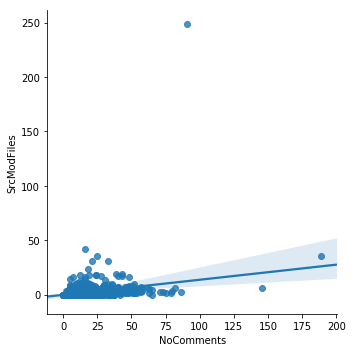

In [47]:
sns.lmplot(x='NoComments', y='SrcModFiles', data=df_snapshot_hadoop)

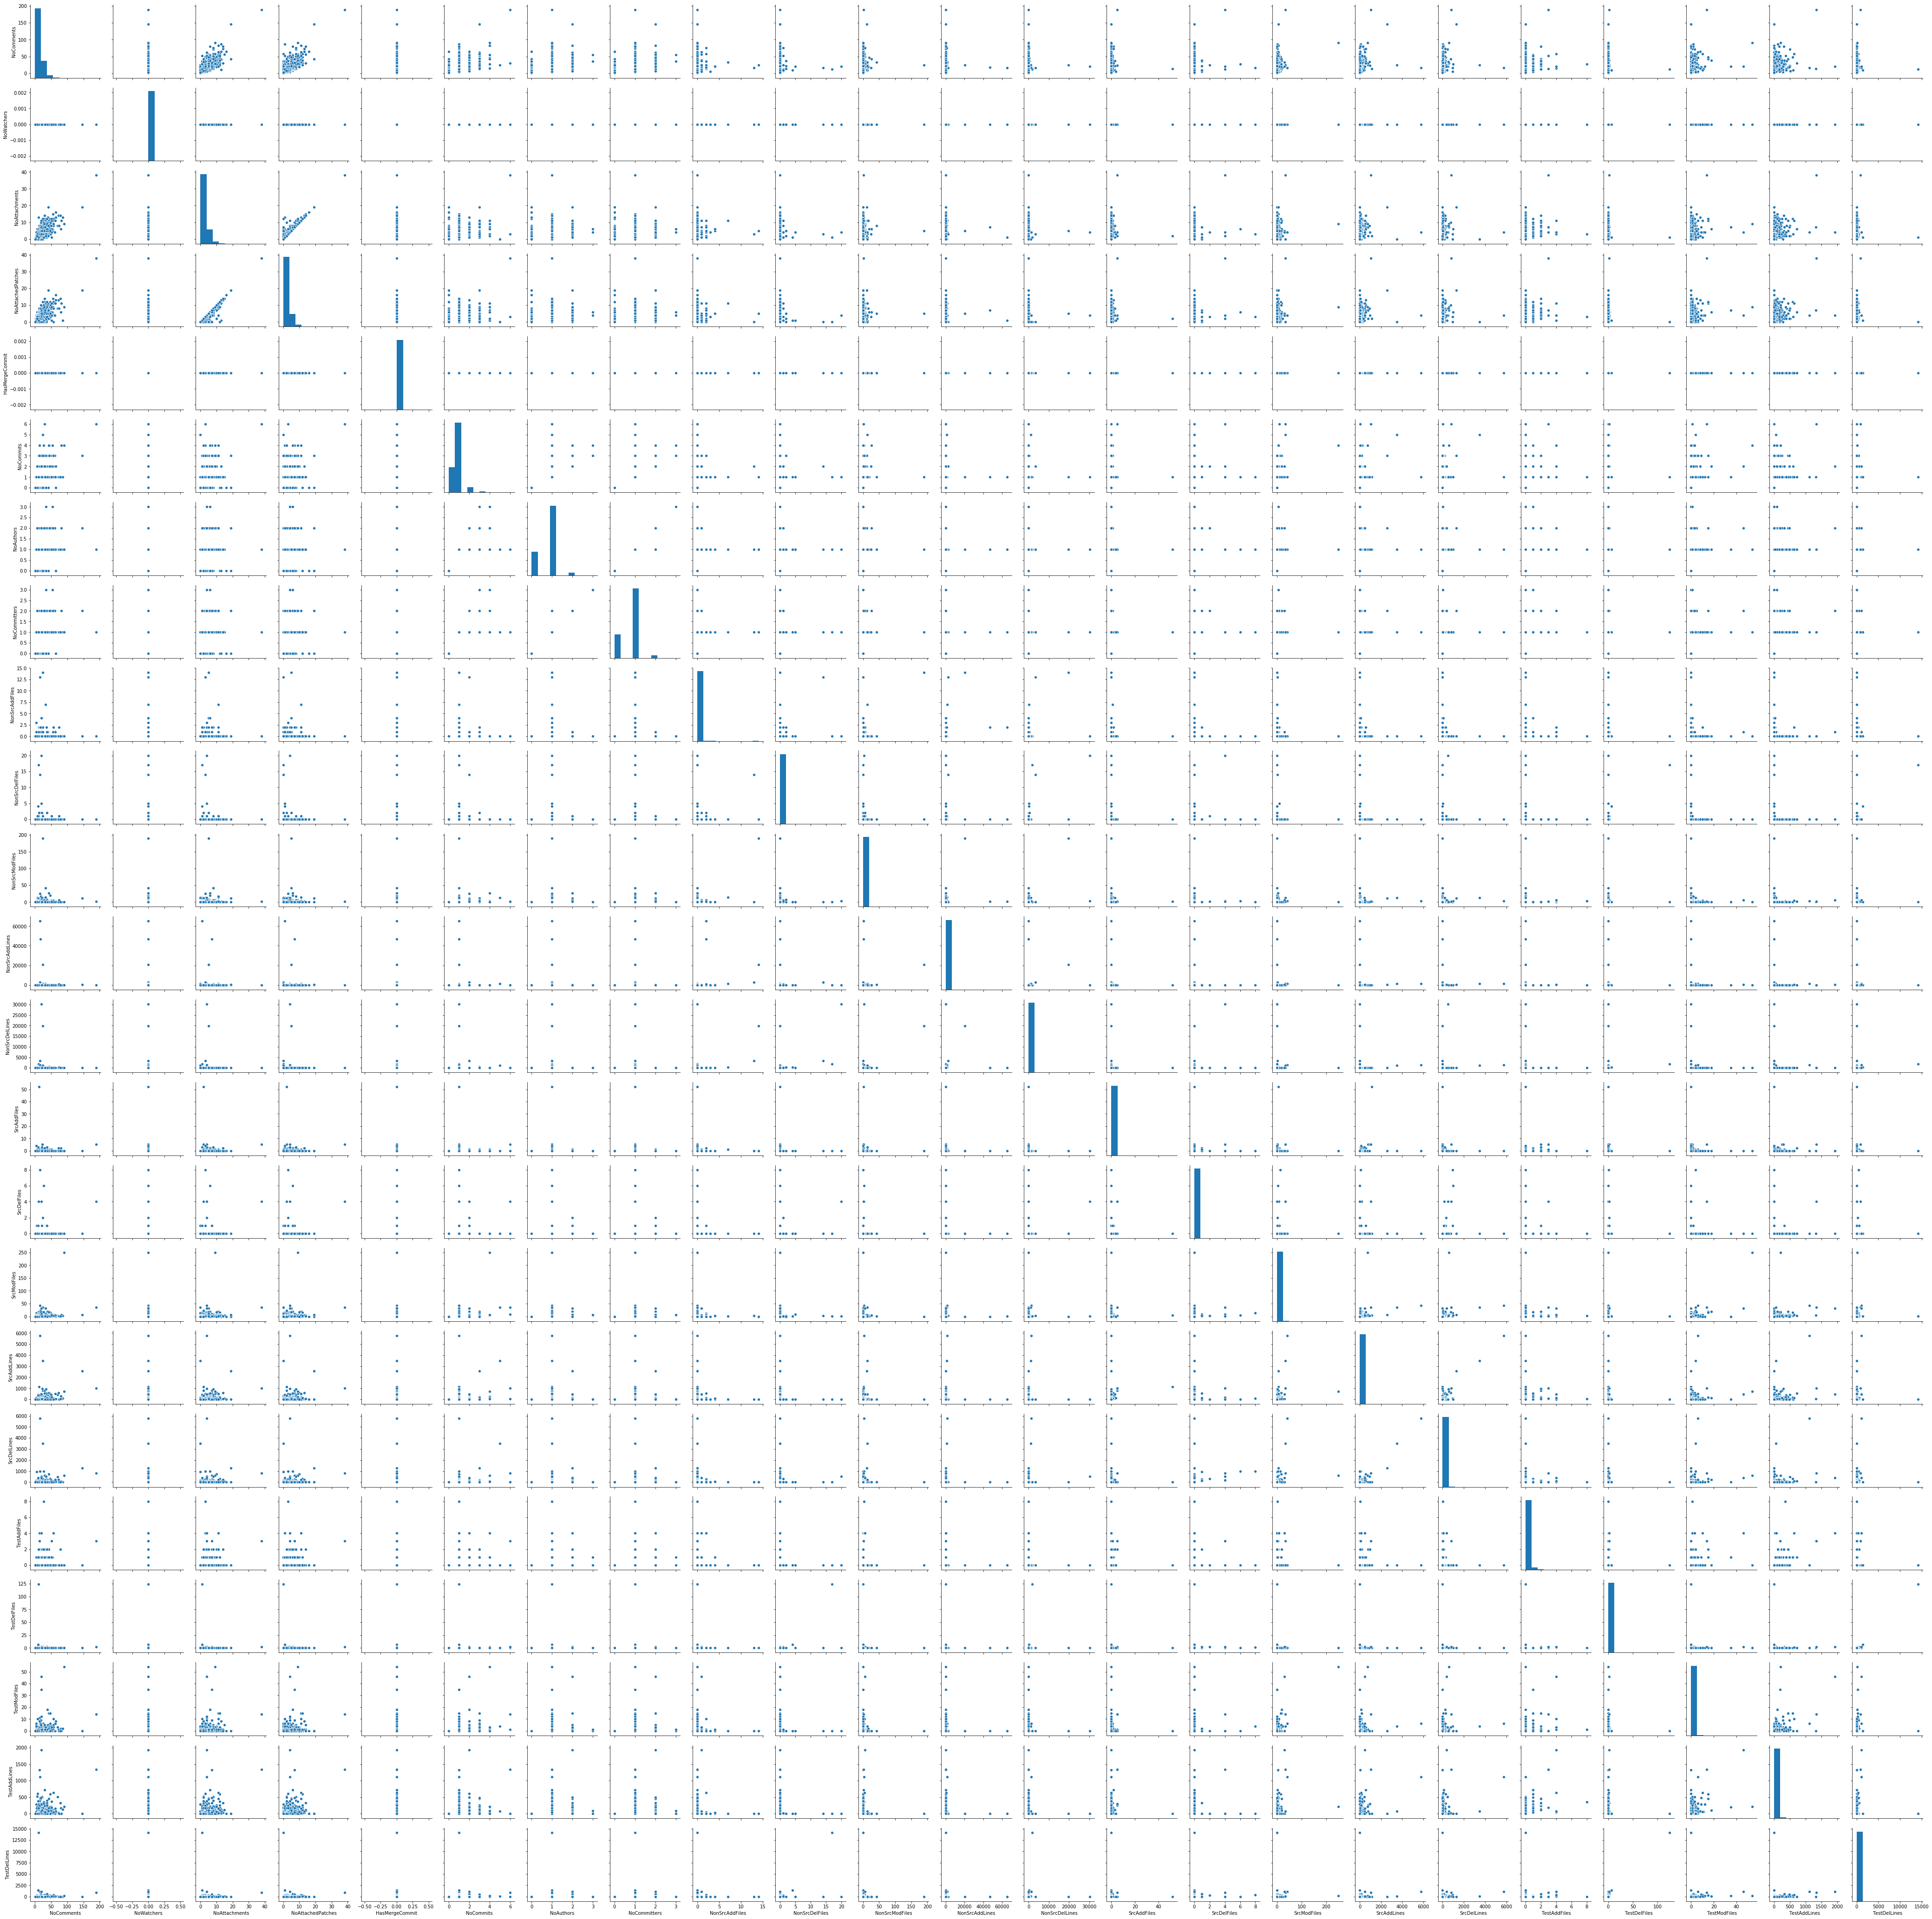

In [48]:
# Basic correlogram
sns.pairplot(df_snapshot_hadoop)
plt.show()

## Mapreduce Bug-Fix

In [49]:
df_snapshot_mapreduce.head(3)

,Unnamed: 0,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,0,MAPREDUCE,ASF,Apache Hadoop Committee,big-data,MAPREDUCE-2,Major,Resolved,amar_kamat,amar_kamat,NaN,error:1 empty:1 key:1,record:2 using:1 contain:1 specified:1 field:1...,exec:30 patch:21 failed:9 apache:7 attaching:6...,2009-06-16 08:37:07+00:00,2009-06-26 08:42:04+00:00,NaN,0.20.1,14,2009-06-16 09:50:40.197000+00:00,2009-07-07 17:34:23.952000+00:00,0,6,2009-06-16 09:50:40.170000+00:00,2009-06-25 10:29:40.710000+00:00,6,2009-06-16 09:50:40.170000+00:00,2009-06-25 10:29:40.710000+00:00,Blocker:MAPREDUCE-735\nIncorporates:MAPREDUCE-52,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,MAPREDUCE,ASF,Apache Hadoop Committee,big-data,MAPREDUCE-3,Major,Resolved,yhemanth,NaN,NaN,set:2 child:1 automatically:1 value:1 ram:1 li...,memory:5 task:3 set:2 parameter:2 user:2 based...,child:4 memory:2 overhead:2 caution:1 needs:1 ...,2009-06-13 05:14:52+00:00,2014-07-22 21:12:30+00:00,NaN,NaN,2,2009-07-11 00:51:28.930000+00:00,2014-07-22 21:12:30.770000+00:00,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,MAPREDUCE,ASF,Apache Hadoop Committee,big-data,MAPREDUCE-12,Major,Resolved,rajive,sreekanth,NaN,tasks:1 task:1 controller:1 inherit:1 groups:1,users:4 groups:4 tom:3 apache:3 group:2 list:2...,attaching:1 patch:1 sets:1 processes:1 group:1...,2009-04-15 22:59:17+00:00,2009-07-29 08:50:13+00:00,NaN,NaN,2,2009-04-16 05:10:01.614000+00:00,2009-07-29 08:50:13.220000+00:00,0,1,2009-04-16 05:10:01.459000+00:00,2009-04-16 05:10:01.459000+00:00,1,2009-04-16 05:10:01.459000+00:00,2009-04-16 05:10:01.459000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_snapshot_mapreduce.drop(['Unnamed: 0'], axis=1, inplace=True)

In [51]:
df_snapshot_mapreduce.head(3)

,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,MAPREDUCE,ASF,Apache Hadoop Committee,big-data,MAPREDUCE-2,Major,Resolved,amar_kamat,amar_kamat,NaN,error:1 empty:1 key:1,record:2 using:1 contain:1 specified:1 field:1...,exec:30 patch:21 failed:9 apache:7 attaching:6...,2009-06-16 08:37:07+00:00,2009-06-26 08:42:04+00:00,NaN,0.20.1,14,2009-06-16 09:50:40.197000+00:00,2009-07-07 17:34:23.952000+00:00,0,6,2009-06-16 09:50:40.170000+00:00,2009-06-25 10:29:40.710000+00:00,6,2009-06-16 09:50:40.170000+00:00,2009-06-25 10:29:40.710000+00:00,Blocker:MAPREDUCE-735\nIncorporates:MAPREDUCE-52,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,MAPREDUCE,ASF,Apache Hadoop Committee,big-data,MAPREDUCE-3,Major,Resolved,yhemanth,NaN,NaN,set:2 child:1 automatically:1 value:1 ram:1 li...,memory:5 task:3 set:2 parameter:2 user:2 based...,child:4 memory:2 overhead:2 caution:1 needs:1 ...,2009-06-13 05:14:52+00:00,2014-07-22 21:12:30+00:00,NaN,NaN,2,2009-07-11 00:51:28.930000+00:00,2014-07-22 21:12:30.770000+00:00,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MAPREDUCE,ASF,Apache Hadoop Committee,big-data,MAPREDUCE-12,Major,Resolved,rajive,sreekanth,NaN,tasks:1 task:1 controller:1 inherit:1 groups:1,users:4 groups:4 tom:3 apache:3 group:2 list:2...,attaching:1 patch:1 sets:1 processes:1 group:1...,2009-04-15 22:59:17+00:00,2009-07-29 08:50:13+00:00,NaN,NaN,2,2009-04-16 05:10:01.614000+00:00,2009-07-29 08:50:13.220000+00:00,0,1,2009-04-16 05:10:01.459000+00:00,2009-04-16 05:10:01.459000+00:00,1,2009-04-16 05:10:01.459000+00:00,2009-04-16 05:10:01.459000+00:00,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df_snapshot_mapreduce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 53 columns):
Project                      2210 non-null object
Owner                        2210 non-null object
Manager                      2210 non-null object
Category                     2210 non-null object
Key                          2210 non-null object
Priority                     2210 non-null object
Status                       2210 non-null object
Reporter                     2210 non-null object
Assignee                     2100 non-null object
Components                   1613 non-null object
SummaryTopWords              2192 non-null object
DescriptionTopWords          2095 non-null object
CommentsTopWords             2207 non-null object
CreationDate                 2210 non-null object
ResolutionDate               2210 non-null object
AffectsVersions              1599 non-null object
FixVersions                  2043 non-null object
NoComments                   2210 non-null 

In [53]:
df_snapshot_mapreduce.describe()

,NoComments,NoWatchers,NoAttachments,NoAttachedPatches,HasMergeCommit,NoCommits,NoAuthors,NoCommitters,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
count,2210.000000,2210.0,2210.000000,2210.000000,2210.0,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,14.550226,0.0,2.528054,2.157014,0.0,0.647511,0.618552,0.618552,0.185520,0.008145,0.298190,35.993665,2.358824,0.067421,0.018552,2.079186,30.502715,10.927149,0.062896,0.014027,0.856109,25.730769,9.970136
std,10.633423,0.0,2.491703,2.330396,0.0,0.572657,0.507722,0.507722,7.601194,0.194833,1.860515,1395.857373,33.410302,0.758520,0.280851,7.538918,329.140170,75.620306,0.284070,0.241248,5.355545,80.317215,107.254317
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.0,2.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,3.000000,3.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,3.000000,0.000000,0.000000,1.000000,13.000000,0.000000
max,101.000000,0.0,36.000000,27.000000,0.0,5.000000,3.000000,3.000000,357.000000,7.000000,65.000000,65111.000000,1121.000000,27.000000,7.000000,271.000000,14205.000000,2747.000000,4.000000,8.000000,206.000000,1978.000000,3974.000000


## HDFS Bug-Fix

In [54]:
df_snapshot_hdfs.head(3)

,Unnamed: 0,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,0,HDFS,ASF,Apache Hadoop Committee,big-data,HDFS-26,Major,Resolved,boryas,boryas,NaN,version:1 quota:1 exceeded:1 message:1 unclear:1,porting:1,patch:3 test:3 post:2 time:2 run:2 usually:1 p...,2009-06-05 22:31:55+00:00,2009-06-22 20:22:47+00:00,NaN,0.20.1,3,2009-06-06 00:15:26.465000+00:00,2009-06-22 20:22:47.744000+00:00,0,1,2009-06-05 22:33:44.383000+00:00,2009-06-05 22:33:44.383000+00:00,1,2009-06-05 22:33:44.383000+00:00,2009-06-05 22:33:44.383000+00:00,Incorporates:HDFS-76,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,HDFS,ASF,Apache Hadoop Committee,big-data,HDFS-29,Major,Closed,szetszwo,szetszwo,datanode,update:1 block:1 may:1 fail:1 due:1 length:1 i...,block:4 length:3 f:3 calls:2 may:2 primary:1 t...,patch:17 exec:13 length:6 hudson:6 append:5 ap...,2009-04-24 18:23:30+00:00,2009-10-14 00:26:16+00:00,NaN,0.21.0,15,2009-05-10 10:01:04.424000+00:00,2011-04-11 16:59:22.910000+00:00,0,3,2009-10-13 00:12:12.359000+00:00,2009-10-13 05:59:22.748000+00:00,3,2009-10-13 00:12:12.359000+00:00,2009-10-13 05:59:22.748000+00:00,Reference:HDFS-142,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,HDFS,ASF,Apache Hadoop Committee,big-data,HDFS-69,Minor,Closed,raviphulari,qwertymaniac,NaN,improve:1 command:1 line:1 help:1,enhance:1 command:1 line:1 help:1 informing:1 ...,common:314 project:245 branch:241 branches:240...,2009-02-23 23:32:06+00:00,2012-01-12 06:52:39+00:00,1.0.0,0.23.1,16,2009-02-27 00:42:47.619000+00:00,2012-01-12 13:22:33.001000+00:00,0,1,2011-11-19 20:46:06.821000+00:00,2011-11-19 20:46:06.821000+00:00,1,2011-11-19 20:46:06.821000+00:00,2011-11-19 20:46:06.821000+00:00,NaN,NaN,0,improve:1 help:1 harsh:1 git:1 id:1 https:1 ap...,1,1,1,2012-01-12 05:13:19+00:00,2012-01-12 05:13:19+00:00,2012-01-12 05:13:19+00:00,2012-01-12 05:13:19+00:00,0,0,0,0,0,0,0,2,6,2,0,0,0,0,0


In [0]:
df_snapshot_hdfs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [56]:
df_snapshot_hdfs.head(3)

,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,HDFS,ASF,Apache Hadoop Committee,big-data,HDFS-26,Major,Resolved,boryas,boryas,NaN,version:1 quota:1 exceeded:1 message:1 unclear:1,porting:1,patch:3 test:3 post:2 time:2 run:2 usually:1 p...,2009-06-05 22:31:55+00:00,2009-06-22 20:22:47+00:00,NaN,0.20.1,3,2009-06-06 00:15:26.465000+00:00,2009-06-22 20:22:47.744000+00:00,0,1,2009-06-05 22:33:44.383000+00:00,2009-06-05 22:33:44.383000+00:00,1,2009-06-05 22:33:44.383000+00:00,2009-06-05 22:33:44.383000+00:00,Incorporates:HDFS-76,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HDFS,ASF,Apache Hadoop Committee,big-data,HDFS-29,Major,Closed,szetszwo,szetszwo,datanode,update:1 block:1 may:1 fail:1 due:1 length:1 i...,block:4 length:3 f:3 calls:2 may:2 primary:1 t...,patch:17 exec:13 length:6 hudson:6 append:5 ap...,2009-04-24 18:23:30+00:00,2009-10-14 00:26:16+00:00,NaN,0.21.0,15,2009-05-10 10:01:04.424000+00:00,2011-04-11 16:59:22.910000+00:00,0,3,2009-10-13 00:12:12.359000+00:00,2009-10-13 05:59:22.748000+00:00,3,2009-10-13 00:12:12.359000+00:00,2009-10-13 05:59:22.748000+00:00,Reference:HDFS-142,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HDFS,ASF,Apache Hadoop Committee,big-data,HDFS-69,Minor,Closed,raviphulari,qwertymaniac,NaN,improve:1 command:1 line:1 help:1,enhance:1 command:1 line:1 help:1 informing:1 ...,common:314 project:245 branch:241 branches:240...,2009-02-23 23:32:06+00:00,2012-01-12 06:52:39+00:00,1.0.0,0.23.1,16,2009-02-27 00:42:47.619000+00:00,2012-01-12 13:22:33.001000+00:00,0,1,2011-11-19 20:46:06.821000+00:00,2011-11-19 20:46:06.821000+00:00,1,2011-11-19 20:46:06.821000+00:00,2011-11-19 20:46:06.821000+00:00,NaN,NaN,0,improve:1 help:1 harsh:1 git:1 id:1 https:1 ap...,1,1,1,2012-01-12 05:13:19+00:00,2012-01-12 05:13:19+00:00,2012-01-12 05:13:19+00:00,2012-01-12 05:13:19+00:00,0,0,0,0,0,0,0,2,6,2,0,0,0,0,0


In [57]:
df_snapshot_hdfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 53 columns):
Project                      3214 non-null object
Owner                        3214 non-null object
Manager                      3214 non-null object
Category                     3214 non-null object
Key                          3214 non-null object
Priority                     3214 non-null object
Status                       3214 non-null object
Reporter                     3214 non-null object
Assignee                     3150 non-null object
Components                   2310 non-null object
SummaryTopWords              3195 non-null object
DescriptionTopWords          3144 non-null object
CommentsTopWords             3211 non-null object
CreationDate                 3214 non-null object
ResolutionDate               3214 non-null object
AffectsVersions              2236 non-null object
FixVersions                  3099 non-null object
NoComments                   3214 non-null 

In [58]:
df_snapshot_hdfs.describe()

,NoComments,NoWatchers,NoAttachments,NoAttachedPatches,HasMergeCommit,NoCommits,NoAuthors,NoCommitters,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
count,3214.000000,3214.0,3214.000000,3214.000000,3214.000000,3214.00000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,16.054760,0.0,2.744244,2.477287,0.000933,0.87430,0.822029,0.823273,0.005600,0.010890,0.227442,10.496577,2.564406,0.030492,0.014001,2.028002,23.683261,13.282825,0.046671,0.010268,0.800249,23.919104,6.061294
std,12.029794,0.0,2.466443,2.378046,0.030542,0.55599,0.454668,0.456519,0.078698,0.260849,1.022733,381.293008,34.336964,0.298878,0.291155,3.554103,97.651533,105.303536,0.259881,0.340566,3.072410,56.214085,66.932218
min,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.0,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.0,2.000000,2.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,0.0,3.000000,3.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,5.000000,0.000000,0.000000,1.000000,24.000000,1.000000
max,189.000000,0.0,23.000000,22.000000,1.000000,4.00000,3.000000,3.000000,2.000000,10.000000,42.000000,21505.000000,1099.000000,12.000000,10.000000,106.000000,3464.000000,4209.000000,7.000000,17.000000,151.000000,876.000000,2965.000000


## YARN Bug-Fix

In [59]:
df_snapshot_yarn.head(3)

,Unnamed: 0,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,0,YARN,ASF,Apache Hadoop Committee,big-data,YARN-12,Major,Closed,djp,djp,scheduler,several:1 issues:1 new:1 yarn:1,yarn:6 apache:5 server:5 scheduler:4 fair:4 in...,patch:70 tests:35 warnings:22 yarn:21 eclipse:...,2012-07-18 03:26:21+00:00,2012-08-08 18:56:14+00:00,2.0.0-alpha,2.0.2-alpha,20,2012-07-18 05:56:31.335000+00:00,2012-08-08 18:56:52.474000+00:00,0,5,2012-07-18 05:34:26.005000+00:00,2012-08-08 16:04:19.255000+00:00,5,2012-07-18 05:34:26.005000+00:00,2012-08-08 16:04:19.255000+00:00,Reference:MAPREDUCE-4439,NaN,0,yarn:1 fix:1 warnings:1 contributed:1 git:1 id...,1,1,1,2012-08-08 18:53:29+00:00,2012-08-08 18:53:29+00:00,2012-08-08 18:53:29+00:00,2012-08-08 18:53:29+00:00,0,0,0,0,0,0,0,3,176,51,0,0,0,0,0
1,1,YARN,ASF,Apache Hadoop Committee,big-data,YARN-13,Critical,Closed,tlipcon,NaN,NaN,merge:1 yarn:1 branch:1 copied:1 trunk:1 tree:1,branch:5 move:2 instead:2 version:2 snapshot:2...,patch:2 pom:2 build:2 simple:1 update:1 fix:1 ...,2012-08-08 19:59:48+00:00,2012-08-08 20:25:08+00:00,2.0.2-alpha,2.0.2-alpha,4,2012-08-08 20:03:44.501000+00:00,2012-08-08 20:11:51.609000+00:00,0,2,2012-08-08 20:03:44.457000+00:00,2012-08-08 20:09:07.531000+00:00,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,YARN,ASF,Apache Hadoop Committee,big-data,YARN-14,Major,Closed,jlowe,jlowe,nodemanager,peer:1 distributed:1 cache:1 files:1 longer:1 ...,x:6 create:2 files:2 z:2 trying:1 another:1 fi...,patch:14 tests:5 yarn:5 eclipse:4 multiple:3 x...,2012-08-03 21:59:02+00:00,2012-08-09 19:23:43+00:00,2.0.0-alpha,0.23.3 2.0.2-alpha,6,2012-08-03 23:49:49.700000+00:00,2012-08-09 19:23:43.898000+00:00,0,2,2012-08-04 00:04:42.656000+00:00,2012-08-08 20:58:43.399000+00:00,2,2012-08-04 00:04:42.656000+00:00,2012-08-08 20:58:43.399000+00:00,NaN,NaN,0,yarn:1 peer:1 distributed:1 cache:1 files:1 lo...,1,1,1,2012-08-09 19:15:56+00:00,2012-08-09 19:15:56+00:00,2012-08-09 19:15:56+00:00,2012-08-09 19:15:56+00:00,0,0,0,0,0,0,0,4,54,30,0,0,3,22,11


In [0]:
df_snapshot_yarn.drop(['Unnamed: 0'], axis=1, inplace=True)

In [61]:
df_snapshot_yarn.head(3)

,Project,Owner,Manager,Category,Key,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,YARN,ASF,Apache Hadoop Committee,big-data,YARN-12,Major,Closed,djp,djp,scheduler,several:1 issues:1 new:1 yarn:1,yarn:6 apache:5 server:5 scheduler:4 fair:4 in...,patch:70 tests:35 warnings:22 yarn:21 eclipse:...,2012-07-18 03:26:21+00:00,2012-08-08 18:56:14+00:00,2.0.0-alpha,2.0.2-alpha,20,2012-07-18 05:56:31.335000+00:00,2012-08-08 18:56:52.474000+00:00,0,5,2012-07-18 05:34:26.005000+00:00,2012-08-08 16:04:19.255000+00:00,5,2012-07-18 05:34:26.005000+00:00,2012-08-08 16:04:19.255000+00:00,Reference:MAPREDUCE-4439,NaN,0,yarn:1 fix:1 warnings:1 contributed:1 git:1 id...,1,1,1,2012-08-08 18:53:29+00:00,2012-08-08 18:53:29+00:00,2012-08-08 18:53:29+00:00,2012-08-08 18:53:29+00:00,0,0,0,0,0,0,0,3,176,51,0,0,0,0,0
1,YARN,ASF,Apache Hadoop Committee,big-data,YARN-13,Critical,Closed,tlipcon,NaN,NaN,merge:1 yarn:1 branch:1 copied:1 trunk:1 tree:1,branch:5 move:2 instead:2 version:2 snapshot:2...,patch:2 pom:2 build:2 simple:1 update:1 fix:1 ...,2012-08-08 19:59:48+00:00,2012-08-08 20:25:08+00:00,2.0.2-alpha,2.0.2-alpha,4,2012-08-08 20:03:44.501000+00:00,2012-08-08 20:11:51.609000+00:00,0,2,2012-08-08 20:03:44.457000+00:00,2012-08-08 20:09:07.531000+00:00,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,YARN,ASF,Apache Hadoop Committee,big-data,YARN-14,Major,Closed,jlowe,jlowe,nodemanager,peer:1 distributed:1 cache:1 files:1 longer:1 ...,x:6 create:2 files:2 z:2 trying:1 another:1 fi...,patch:14 tests:5 yarn:5 eclipse:4 multiple:3 x...,2012-08-03 21:59:02+00:00,2012-08-09 19:23:43+00:00,2.0.0-alpha,0.23.3 2.0.2-alpha,6,2012-08-03 23:49:49.700000+00:00,2012-08-09 19:23:43.898000+00:00,0,2,2012-08-04 00:04:42.656000+00:00,2012-08-08 20:58:43.399000+00:00,2,2012-08-04 00:04:42.656000+00:00,2012-08-08 20:58:43.399000+00:00,NaN,NaN,0,yarn:1 peer:1 distributed:1 cache:1 files:1 lo...,1,1,1,2012-08-09 19:15:56+00:00,2012-08-09 19:15:56+00:00,2012-08-09 19:15:56+00:00,2012-08-09 19:15:56+00:00,0,0,0,0,0,0,0,4,54,30,0,0,3,22,11


In [62]:
df_snapshot_yarn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 53 columns):
Project                      2090 non-null object
Owner                        2090 non-null object
Manager                      2090 non-null object
Category                     2090 non-null object
Key                          2090 non-null object
Priority                     2090 non-null object
Status                       2090 non-null object
Reporter                     2090 non-null object
Assignee                     2067 non-null object
Components                   1253 non-null object
SummaryTopWords              2071 non-null object
DescriptionTopWords          1993 non-null object
CommentsTopWords             2087 non-null object
CreationDate                 2090 non-null object
ResolutionDate               2090 non-null object
AffectsVersions              1133 non-null object
FixVersions                  2043 non-null object
NoComments                   2090 non-null 

In [63]:
df_snapshot_yarn.describe()

,NoComments,NoWatchers,NoAttachments,NoAttachedPatches,HasMergeCommit,NoCommits,NoAuthors,NoCommitters,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
count,2090.000000,2090.0,2090.000000,2090.000000,2090.0,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,17.014354,0.0,3.028230,2.847847,0.0,1.026794,0.979426,0.980383,0.008612,0.002871,0.293780,6.001435,1.523445,0.073206,0.023923,2.424880,33.672249,17.247847,0.072249,0.004785,1.090909,36.167464,10.224402
std,12.675792,0.0,2.793459,2.745606,0.0,0.409614,0.283684,0.285434,0.144874,0.053516,1.236825,116.794024,13.305436,0.499784,0.277446,3.604735,103.149268,73.926935,0.598422,0.081724,3.401822,115.041877,56.796782
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,2.000000,2.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,2.000000,0.000000,0.000000,1.000000,4.000000,0.000000
75%,21.000000,0.0,4.000000,4.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,27.750000,11.000000,0.000000,0.000000,1.000000,41.750000,3.000000
max,112.000000,0.0,30.000000,30.000000,0.0,5.000000,3.000000,3.000000,5.000000,1.000000,36.000000,5166.000000,299.000000,10.000000,7.000000,70.000000,2061.000000,1593.000000,24.000000,2.000000,109.000000,4026.000000,1556.000000
